In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from keras.utils import load_img, img_to_array
import os
from PIL import Image

In [43]:
# Define the path to the CIFAR-10 dataset directory
cifar_path = r"C:\Users\EqUiNox\Downloads\CIFAR-10-images-master\CIFAR-10-images-master\train"

# Define the class names and their corresponding numeric labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)
label_map = {class_names[i]: i for i in range(num_classes)}

# Function to load and grayscale the CIFAR-10 images
def load_cifar10_gray(path):
    # Initialize lists to store the grayscale images and labels
    gray_images = []
    labels = []

    # Iterate over the image folders
    for folder in os.listdir(path):
        # Get the label from the folder name
        label = label_map[folder]

        # Iterate over the image files in the folder
        for file in os.listdir(os.path.join(path, folder)):
            # Load the image using PIL
            image = Image.open(os.path.join(path, folder, file))

            # Convert the image to grayscale
            gray_image = image.convert("L")

            # Convert the grayscale image to numpy array
            gray_array = np.array(gray_image)

            # Append the grayscale image and label to the lists
            gray_images.append(gray_array)
            labels.append(label)

    # Convert the lists to numpy arrays
    gray_images = np.array(gray_images)
    labels = np.array(labels)

    return gray_images, labels

# Load and grayscale the CIFAR-10 dataset
X_gray, y = load_cifar10_gray(cifar_path)

# Flatten the grayscale images
X = X_gray.reshape(len(X_gray), -1)

In [44]:

# Define values of K to try
k_values = range(1, 21)

# Define distance metrics
metrics = ['manhattan', 'euclidean']

# Initialize lists to store average accuracies for each distance metric
avg_accuracies_manhattan = []
avg_accuracies_euclidean = []


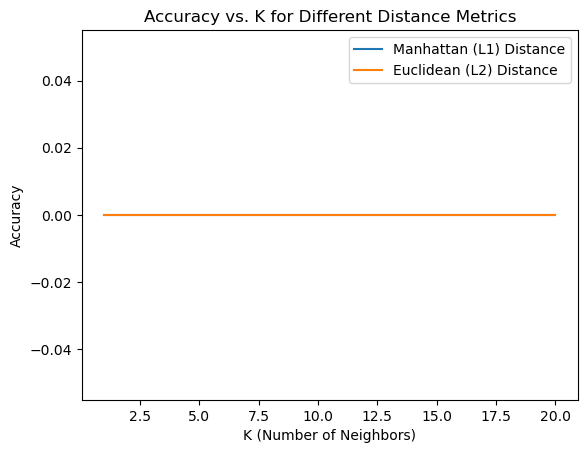

In [45]:

# Perform 5-fold cross-validation for each distance metric and K value
kfold = KFold(n_splits=5)
for metric in metrics:
    accuracies = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        scores = cross_val_score(knn, X, y, cv=kfold, scoring='accuracy')
        avg_accuracy = np.mean(scores)
        accuracies.append(avg_accuracy)
    
    if metric == 'manhattan':
        avg_accuracies_manhattan = accuracies
    else:
        avg_accuracies_euclidean = accuracies

# Plot accuracy graph for Manhattan (L1) distance
plt.plot(k_values, avg_accuracies_manhattan, label='Manhattan (L1) Distance')

# Plot accuracy graph for Euclidean (L2) distance
plt.plot(k_values, avg_accuracies_euclidean, label='Euclidean (L2) Distance')

plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K for Different Distance Metrics')
plt.legend()
plt.show()
